In [ ]:
!pip install numpy
!pip install scikit-learn
!pip install matplotlib

In [3]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [6]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)

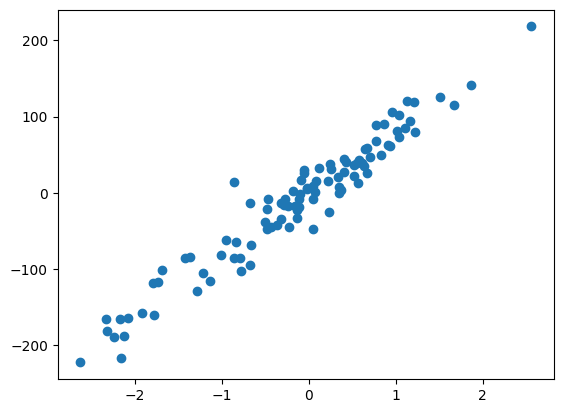

In [11]:
plt.scatter(X, y)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
model.fit(X, y)
print(model.coef_)
print(model.intercept_)

[79.69877672]
-0.7392762261322208


In [39]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(model, X, y, scoring='r2', cv=10))

np.float64(0.9143664779420424)

### Creating Custom Model

In [50]:
class GDRegression:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.m = 100
        self.b = -100

    def fit(self, X, y):
        # Calculate b using GD
        for _ in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
            self.b = self.b - self.learning_rate * loss_slope_b
            loss_slope_m = -2 * np.sum((y - self.m * X.ravel() - self.b) * X.ravel())
            self.m = self.m - self.learning_rate * loss_slope_m

        print(self.b)
        print(self.m)

    def predict(self, X):
        return self.m * X + self.b

In [52]:
gd_model = GDRegression(0.001, 100)
gd_model.fit(X, y)

-0.7392763259396696
79.6987766529804


In [54]:
y_pred = gd_model.predict(X)

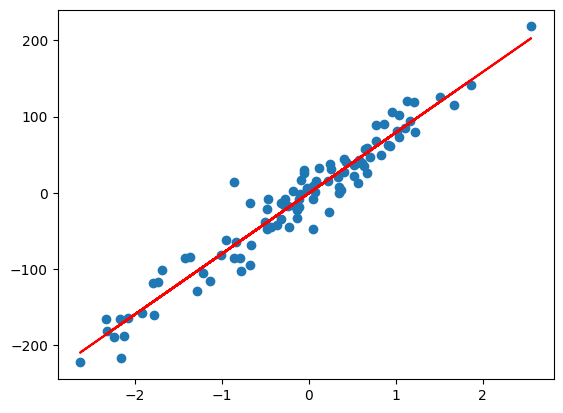

In [57]:
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")